In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd

C:\Users\User


In [3]:
#adding dataset

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\data.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [7]:
#a few graphs

In [8]:
count=df['deposit'].value_counts()

In [9]:
count

no     4428
yes    3943
Name: deposit, dtype: int64

<AxesSubplot:>

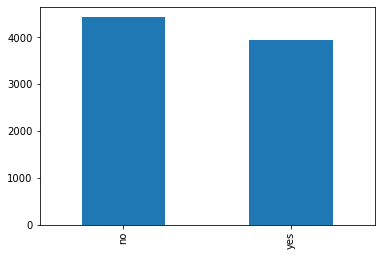

In [10]:
count.plot(kind="bar")

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='marital', ylabel='count'>

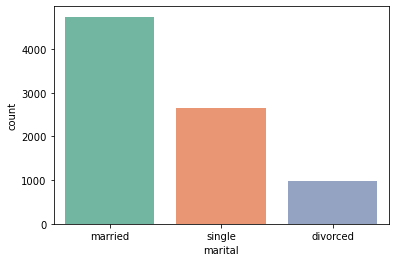

In [12]:
sns.countplot(x="marital",data=df,palette="Set2")

In [13]:
#encoding data

In [14]:
df['deposit']=df['deposit'].apply(
    lambda x:1 if x== 'yes' else(0 if x=='no' else None))
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
#dataset['deposit'] = le.fit_transform(dataset['deposit'])
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['housing'] = le.fit_transform(df['housing'])
df['marital'] = le.fit_transform(df['marital'])
df['default'] = le.fit_transform(df['default'])

In [15]:
x = df.drop(["deposit"], axis = 1)
y = df.deposit.values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
#running the decision tree algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 77.67%


In [19]:
#the scores 

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred=dtc.predict(x_test)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.769
Recall: 0.754
F1 Score: 0.761


In [21]:
dtc.predict(x_test)



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
#importing and encoding test dataset

In [23]:
df_test = pd.read_csv("test_data.csv")



In [24]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df_test['job'] = le.fit_transform(df_test['job'])
df_test['education'] = le.fit_transform(df_test['education'])
df_test['loan'] = le.fit_transform(df_test['loan'])
df_test['contact'] = le.fit_transform(df_test['contact'])
df_test['month'] = le.fit_transform(df_test['month'])
df_test['poutcome'] = le.fit_transform(df_test['poutcome'])
df_test['housing'] = le.fit_transform(df_test['housing'])
df_test['marital'] = le.fit_transform(df_test['marital'])
df_test['default'] = le.fit_transform(df_test['default'])

In [25]:
x_final_test=df_test


In [26]:
pred=dtc.predict(x_final_test)


In [27]:
#result data

In [28]:
pred = pd.DataFrame(pred, columns=['deposit']).to_csv('result_data.csv')

In [29]:
result=pd.read_csv("result_data.csv")

In [30]:
result['deposit']=result['deposit'].apply(
    lambda x: 'yes' if x== 1 else ('no' if x ==0 else None))

In [31]:
result=pd.DataFrame(result,columns=['deposit']).to_csv('result_data.csv')